In [4]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import networkx as nx

In [5]:
NOISE_LEVEL = 0.2
N_SAMPLES = 1000

In [6]:
# Utility function
def plot_abc(a, b, c, title):
    plt.suptitle(title)
    plt.subplot(221)
    plt.scatter(a,b, marker="+")
    plt.xlabel("a")
    plt.ylabel("b")
    plt.subplot(222)
    plt.scatter(a,c, marker="+")
    plt.xlabel("a")
    plt.ylabel("c")
    plt.subplot(223)
    plt.scatter(b,c, marker="+")
    plt.xlabel("b")
    plt.ylabel("c")
    plt.tight_layout()
    plt.show()

def do_regression(a, b, c):
    X = pd.DataFrame({'A': a, 'B': b})
    X = sm.add_constant(X, prepend=True)
    model = sm.OLS(c, X) # Ordinary Linear Regression
    results = model.fit()
    return results

# Chain dependancy

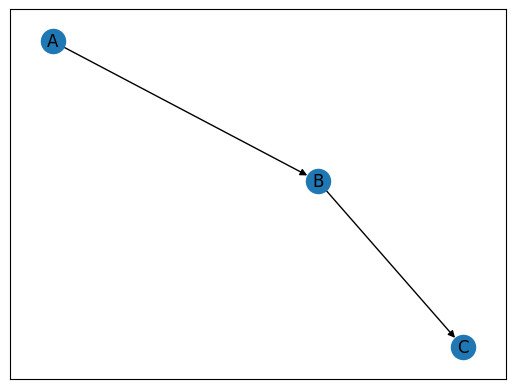

In [7]:
# Draw graph
g = nx.DiGraph()
g.add_nodes_from("ABC")
g.add_edges_from([("A", "B"), ("B", "C")])
pos = nx.nx_pydot.graphviz_layout(g)
nx.draw_networkx(g, pos)
plt.show()

In [8]:
# Generate random data
def generate_chain(samples, noise):
  a = np.random.randn(samples)
  b = a + noise*np.random.randn(samples)
  c = b + noise*np.random.randn(samples)
  return a, b, c


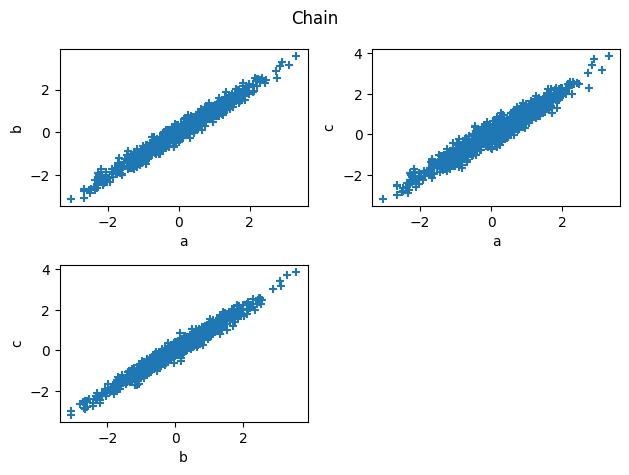

In [9]:
# Plot all pairs
a, b, c = generate_chain(N_SAMPLES, NOISE_LEVEL)
plot_abc(a, b, c, "Chain")

In [15]:
do_regression(a, b, c).summary() # c = Aa + Bb + e

# QUESTION 1 WHAT DOES THE COEFFICIENT TELL YOU

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                 1.319e+04
Date:                Sat, 17 May 2025   Prob (F-statistic):               0.00
Time:                        01:36:20   Log-Likelihood:                 178.07
No. Observations:                1000   AIC:                            -350.1
Df Residuals:                     997   BIC:                            -335.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.006      0.085      0.932      -0.012       0.013
A              0.0328      0.033      0.984      0.325      -0.033       0.098
B              0.9733      0.032     30.280      0.000       0.910       1.036
==============================================================================
Omnibus:                        0.358   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.836   Jarque-Bera (JB):                0.355
Skew:                          -0.046   Prob(JB):                        0.837
Kurtosis:                       2.990   Cond. No.                         10.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Fork

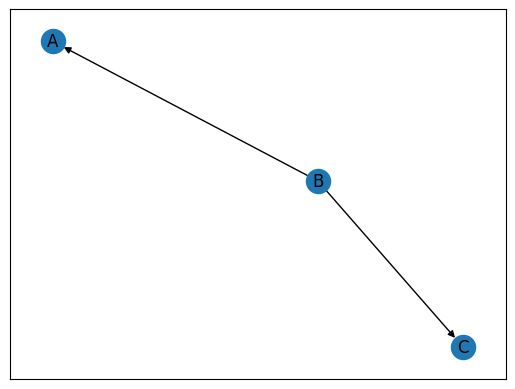

In [14]:
# Draw graph
g = nx.DiGraph()
g.add_nodes_from("ABC")
g.add_edges_from([("B", "A"), ("B", "C")])
pos = nx.nx_pydot.graphviz_layout(g)
nx.draw_networkx(g, pos)
plt.show()

In [15]:
# Generate random data
def generate_fork(samples, noise):
  b = np.random.randn(samples)
  a = b + noise*np.random.randn(samples)
  c = b + noise*np.random.randn(samples)
  return a, b, c

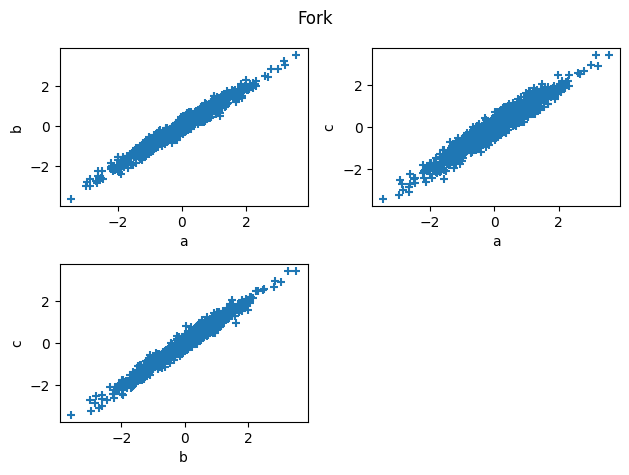

In [28]:
# Plot all pairs
a, b, c = generate_fork(N_SAMPLES, NOISE_LEVEL)
plot_abc(a, b, c, "Fork")

In [29]:
do_regression(a, b, c).summary()

# QUESTION 2 WHAT DOES THE COEFFICIENT TELL YOU

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                 1.274e+04
Date:                Fri, 07 Feb 2025   Prob (F-statistic):               0.00
Time:                        08:41:49   Log-Likelihood:                 220.01
No. Observations:                1000   AIC:                            -434.0
Df Residuals:                     997   BIC:                            -419.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0101      0.006     -1.648      0.100      -0.022       0.002
A             -0.0011      0.031     -0.035      0.972      -0.062       0.060
B              1.0091      0.031     32.122      0.000       0.947       1.071
==============================================================================
Omnibus:                        4.077   Durbin-Watson:                   2.078
Prob(Omnibus):                  0.130   Jarque-Bera (JB):                3.982
Skew:                           0.153   Prob(JB):                        0.137
Kurtosis:                       3.049   Cond. No.                         9.85
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Collider

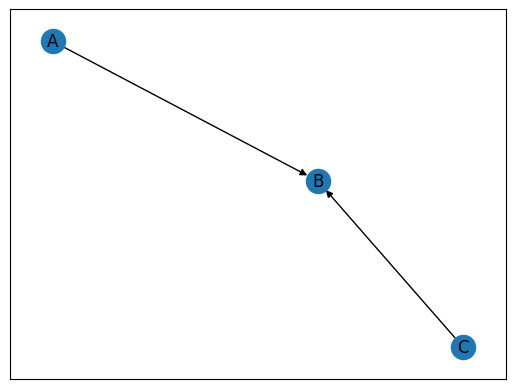

In [36]:
# Draw graph
g = nx.DiGraph()
g.add_nodes_from("ABC")
g.add_edges_from([("A", "B"), ("C", "B")])
pos = nx.nx_pydot.graphviz_layout(g)
nx.draw_networkx(g, pos)
plt.show()

In [37]:
# Generate random data
def generate_colliders(samples, noise):
  a = np.random.randn(samples)
  c = np.random.randn(samples)
  b = a + c + noise*np.random.randn(samples)
  return a, b, c

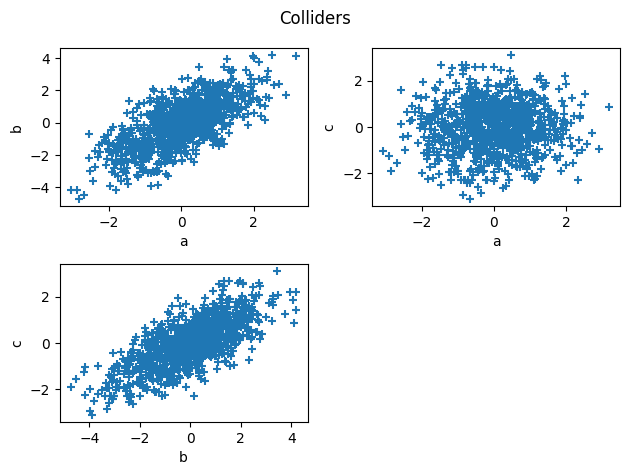

In [43]:
# Plot all pairs
a, b, c = generate_colliders(N_SAMPLES, NOISE_LEVEL)
plot_abc(a, b, c, "Colliders")

In [44]:
do_regression(a, b, c).summary()

# QUESTION 3 WHAT DOES THE COEFFICIENT TELL YOU

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                 1.437e+04
Date:                Fri, 07 Feb 2025   Prob (F-statistic):               0.00
Time:                        08:43:41   Log-Likelihood:                 247.92
No. Observations:                1000   AIC:                            -489.8
Df Residuals:                     997   BIC:                            -475.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0017      0.006     -0.280      0.780      -0.013       0.010
A             -0.9534      0.008   -115.335      0.000      -0.970      -0.937
B              0.9551      0.006    169.498      0.000       0.944       0.966
==============================================================================
Omnibus:                        1.488   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.475   Jarque-Bera (JB):                1.533
Skew:                          -0.061   Prob(JB):                        0.465
Kurtosis:                       2.852   Cond. No.                         2.58
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""